In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
from sklearn.preprocessing import OneHotEncoder
from pandas import get_dummies

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [8]:
from sklearn.feature_selection import SelectFromModel

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalance

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

In [12]:
train = pd.read_csv('Training.csv')
test = pd.read_csv('Test.csv')

In [13]:
print(train)

         ID  response                                 IL1  \
0      4569         1  Account Assistance / Mycd Settings   
1      4402         0                            Freetime   
2      9533         0                             Content   
3      9981         0                       Kindle Tablet   
4      1849         0                             Content   
...     ...       ...                                 ...   
6810   3650         0                                 Wms   
6811  11029         1    Wms / Order Support / Edge-Cases   
6812  10997         0                             Content   
6813   7784         0                                 NaN   
6814  10269         0                  Kindle Tablet Apps   

                                    IL2                                 IL3  \
0                    Payment Assistance                       1-Click Setup   
1     Freetime Unlimited / Subscription                              Refund   
2                       Conten

In [14]:
train = train.fillna(train[['score1','score2','score3','score4','score5']].mean())
test = test.fillna(train[['score1','score2','score3','score4','score5']].mean())


In [15]:
train[['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','contact_type']] =train[['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','contact_type']].fillna('Not Specified')
test[['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','contact_type']] =test[['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','contact_type']].fillna('Not Specified')

In [16]:
categorical_columns =['IL1','IL2','IL3','IL4','CIL1','CIL2','CIL3','CLI4','device','contact_type']

In [17]:
for c in categorical_columns:
    unique_elements = pd.concat([train[c],test[c]]).unique().tolist()
    train[c] = train[c].astype('category').cat.set_categories(unique_elements)
    test[c] = test[c].astype('category').cat.set_categories(unique_elements)

In [18]:
train_oneHot = pd.get_dummies(train)
test_oneHot = pd.get_dummies(test)

In [19]:
featureList = train_oneHot.columns.drop(['response','ID']).tolist()
X = train_oneHot[featureList]
y = train_oneHot['response']
X_test = test_oneHot[featureList]

In [28]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', DecisionTreeClassifier())
])

In [29]:
pipe = pipe.set_params(pca__n_components = 20, clf__class_weight={0:1,1:16})

In [30]:
train_sizes, train_scores, valid_scores = learning_curve(pipe, X, y,scoring = 'f1')

In [31]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

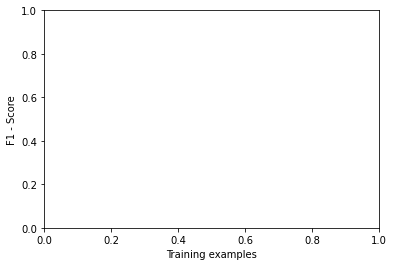

In [32]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

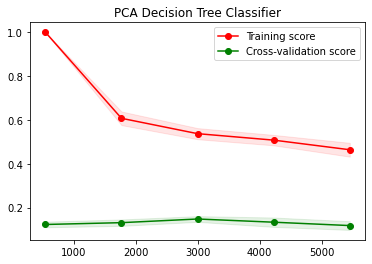

In [43]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("PCA Decision Tree Classifier")
plt.show()

In [40]:
n_components = [5,20]
max_depth = [5,10]
class_weight=[{0:1,1:1},{0:1,1:4},{0:1,1:16},{0:1,1:64},"balanced"]

In [41]:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, clf__max_depth = max_depth,clf__class_weight = class_weight), scoring = 'f1')
estimator = estimator.fit(X, y)
estimator.best_score_
estimator.best_params_

{'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'pca__n_components': 5}

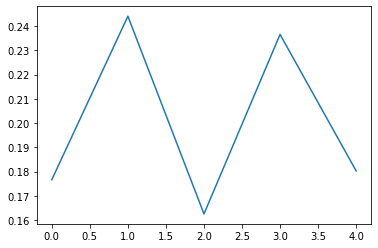

In [42]:
plt.plot(estimator.best_estimator_.named_steps['clf'].feature_importances_)

In [44]:
pipe = pipe.set_params(pca__n_components = 5,clf__max_depth=10, clf__class_weight="balanced")

In [45]:
train_sizes, train_scores, valid_scores = learning_curve(pipe, X, y,scoring = 'f1',n_jobs=-1)

In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

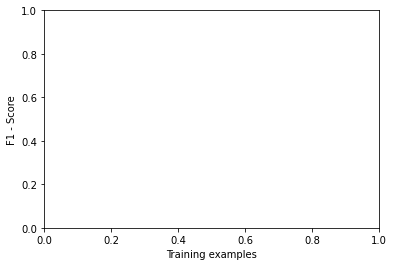

In [47]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

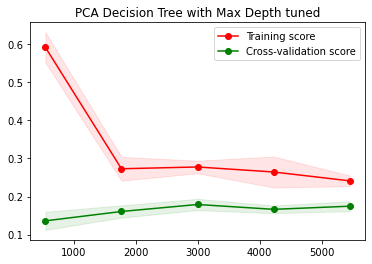

In [48]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("PCA Decision Tree with Max Depth tuned")
plt.show()

In [49]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [52]:
n_estimators = [100,1000]
max_depth = [5,10]
max_features = ["log2","sqrt"]
class_weight =  ["balanced","balanced_subsample"]
min_weight_fraction_leaf = [0.0,0.001]

In [53]:
estimator = GridSearchCV(pipe_rf, dict(rf__n_estimators = n_estimators, rf__max_depth=max_depth, rf__max_features = max_features, rf__class_weight = class_weight,rf__min_weight_fraction_leaf = min_weight_fraction_leaf), scoring = 'f1')
estimator = estimator.fit(X, y)
estimator.best_score_
estimator.best_params_

{'rf__class_weight': 'balanced_subsample',
 'rf__max_depth': 10,
 'rf__max_features': 'log2',
 'rf__min_weight_fraction_leaf': 0.001,
 'rf__n_estimators': 1000}

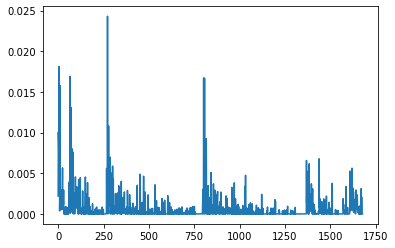

In [54]:
plt.plot(estimator.best_estimator_.named_steps['rf'].feature_importances_)

In [55]:
pipe_random = pipe_rf.set_params(rf__n_estimators = 1000, rf__max_depth=10, rf__max_features = "log2", rf__class_weight = "balanced_subsample",rf__min_weight_fraction_leaf = 0.001
                            )

In [56]:
train_sizes, train_scores, valid_scores = learning_curve(pipe_random, X, y, scoring = 'f1',cv=5)

In [57]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

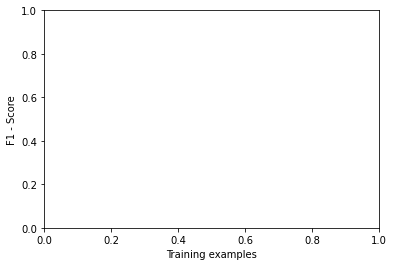

In [58]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

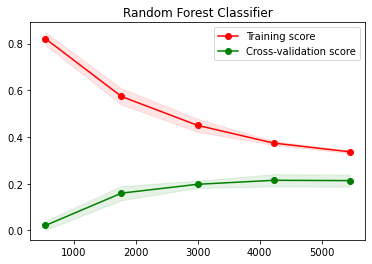

In [59]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Random Forest Classifier")
plt.show()

In [60]:
pipe_bag = Pipeline([
    ('scaler', StandardScaler()),
    ('bag', BaggingClassifier())
])

In [61]:
n_estimators = [10,100]
max_samples = [0.1,1,10]
max_features = [0.1,1,10]

In [62]:
estimator = GridSearchCV(pipe_bag, dict(bag__n_estimators = n_estimators, bag__max_samples=max_samples,bag__max_features = max_features), scoring = 'f1')
estimator = estimator.fit(X, y)
estimator.best_score_
estimator.best_params_

{'bag__max_features': 0.1, 'bag__max_samples': 0.1, 'bag__n_estimators': 10}

In [63]:
pipe_bagging = pipe_bag.set_params(bag__n_estimators = 10, bag__max_samples=0.1, bag__max_features = 0.1
                            )

In [68]:
train_sizes, train_scores, valid_scores = learning_curve(pipe_bagging, X, y, scoring = 'f1')

In [69]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

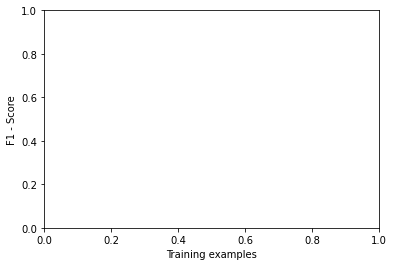

In [70]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

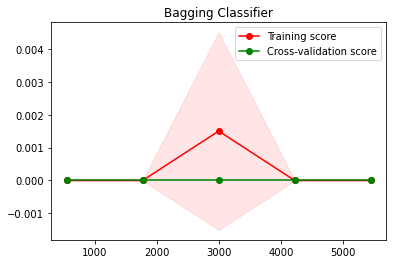

In [71]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Bagging Classifier")
plt.show()

In [76]:
pipe_overclf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('over', RandomOverSampler()),
    ('clf', DecisionTreeClassifier())
])

In [77]:
sampling_strategy = ['minority',0.5]
n_components = [5,20]
max_depth = [5,10]

In [78]:
estimator = GridSearchCV(pipe_overclf, dict(over__sampling_strategy = sampling_strategy, pca__n_components=n_components, clf__max_depth = max_depth), scoring = 'f1')
estimator = estimator.fit(X, y)
estimator.best_score_
estimator.best_params_

{'clf__max_depth': 10,
 'over__sampling_strategy': 'minority',
 'pca__n_components': 20}

In [79]:
pipe_overclf = pipe_overclf.set_params(pca__n_components = 20, over__sampling_strategy = 'minority', clf__max_depth=10)

In [80]:
train_sizes, train_scores, valid_scores = learning_curve(pipe_overclf, X, y,scoring = 'f1',cv = 5)

In [81]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

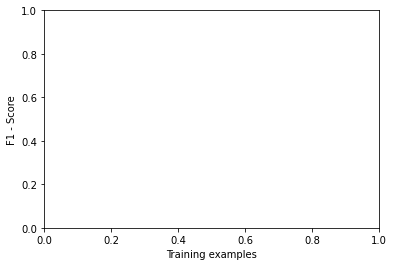

In [82]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

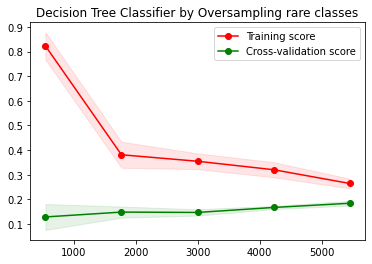

In [83]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Decision Tree Classifier by Oversampling rare classes")
plt.show()

In [84]:
pipe_overrf = Pipeline([
    ('scaler', StandardScaler()),
    ('over', RandomOverSampler()),
    ('rf', RandomForestClassifier())
])

In [86]:
sampling_strategy = ['minority',0.5]
n_estimators = [100,1000]
max_depth = [5,10]
max_features = ["log2","sqrt"]
min_weight_fraction_leaf = [0.0,0.001]

In [87]:
estimator = GridSearchCV(pipe_overrf, dict(over__sampling_strategy = sampling_strategy, rf__n_estimators = n_estimators, rf__max_depth=max_depth, rf__max_features = max_features,rf__min_weight_fraction_leaf = min_weight_fraction_leaf), scoring = 'f1')
estimator = estimator.fit(X, y)
estimator.best_score_
estimator.best_params_

{'over__sampling_strategy': 'minority',
 'rf__max_depth': 10,
 'rf__max_features': 'log2',
 'rf__min_weight_fraction_leaf': 0.001,
 'rf__n_estimators': 1000}

In [88]:
pipe_overrf = pipe_overrf.set_params(over__sampling_strategy = 'minority', rf__n_estimators = 1000, rf__max_depth=10, rf__max_features = "log2",rf__min_weight_fraction_leaf = 0.001
                            )

In [89]:
train_sizes, train_scores, valid_scores = learning_curve(pipe_overrf, X, y, scoring = 'f1',cv=5)

In [90]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Text(0, 0.5, 'F1 - Score')

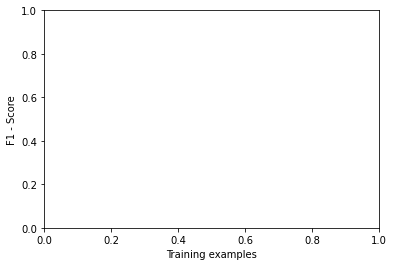

In [91]:
plt.xlabel("Training examples")
plt.ylabel("F1 - Score")

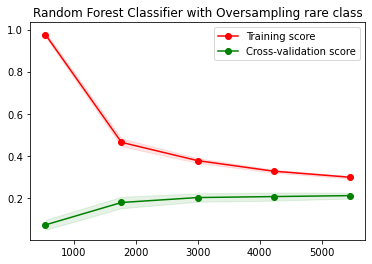

In [92]:
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std,
alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Random Forest Classifier with Oversampling rare class")
plt.show()